In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
abaloneData = pd.read_csv("https://github.com/RyanDux03/Abalone-Age-prediction-model/blob/main/abalone/abalone.data?raw=true")
abaloneData.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abaloneData.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


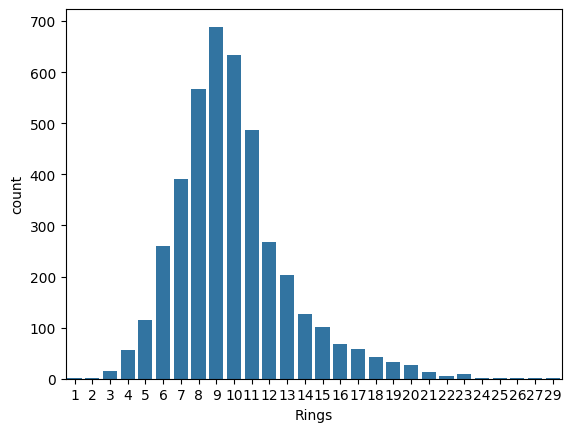

In [75]:
#plot rings counts from abaloneData
sns.countplot(x='Rings', data=abaloneData)
plt.show()


In [76]:
abaloneData.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [77]:
#convert sex from categorical to numerical
abaloneData['Sex'] = abaloneData['Sex'].map({'M':0,'F':1,'I':2})
abaloneData.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [78]:
#Standardize and normalize attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = abaloneData.drop('Rings', axis=1)
y = abaloneData['Rings']

standardized_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(standardized_data, columns=X.columns)


In [79]:
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.154669,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054
1,0.053524,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277
2,-1.154669,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404
3,1.261716,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816
4,1.261716,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848


In [80]:
X_scaled.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03
mean,-2.382088e-17,-7.146263e-16,2.041789e-16,-8.167158e-17,-6.805965e-18,-2.007760e-16,-5.785070e-17,-2.382088e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-1.154669e+00,-3.738991e+00,-3.556025e+00,-3.336261e+00,-1.686127e+00,-1.614754e+00,-1.643254e+00,-1.705166e+00
25%,-1.154669e+00,-6.162857e-01,-5.833625e-01,-5.864718e-01,-7.898559e-01,-7.812450e-01,-7.959109e-01,-7.820068e-01
50%,5.352386e-02,1.747997e-01,1.723991e-01,1.130858e-02,-5.927735e-02,-1.054267e-01,-8.770096e-02,-3.485830e-02
75%,1.261716e+00,7.577048e-01,7.266242e-01,6.090889e-01,6.616145e-01,6.424789e-01,6.604242e-01,6.476332e-01
max,1.261716e+00,2.423148e+00,2.439684e+00,2.368341e+01,4.071831e+00,5.084858e+00,5.286027e+00,5.504099e+00


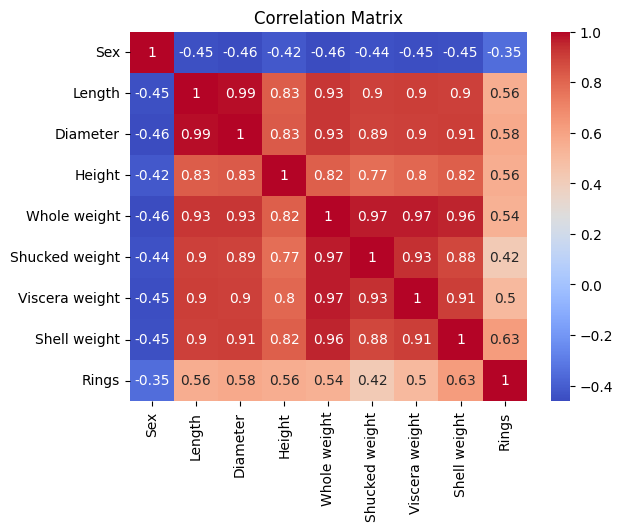

In [81]:
correlation_matrix = abaloneData.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [82]:
# Select the three variables with highest correlation to be the features
features = ['Shell weight', 'Diameter', 'Height']
X = X_scaled[features]

In [83]:
# split model into training and testing parts

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [84]:
X_train.shape, X_test.shape

((3340, 3), (836, 3))

# SGDRegressor Model



In [85]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=2500, tol=1e-3, learning_rate='optimal')
sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', max_iter=2500)

In [86]:
sgd.coef_

array([ 1.62266315, -0.75703806,  0.69793417])

In [87]:
sgd.intercept_

array([9.52624724])

In [88]:
sgd.score(X_train, y_train)

0.36890088249111064

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [90]:
mse, mae, rmse, ev, r2

(7.107057982391096,
 1.8283897681394239,
 np.float64(2.665906596711726),
 0.3110469337412882,
 0.2857527866311903)

# OLS Model

In [91]:
import statsmodels.api as sm
X = abaloneData.drop('Rings', axis=1)
y = abaloneData['Rings']

In [92]:
features = ['Shell weight', 'Diameter', 'Height']
X = X[features]

In [93]:
X.head()

,Shell weight,Diameter,Height
0,0.070,0.265,0.090
1,0.210,0.420,0.135
2,0.155,0.365,0.125
3,0.055,0.255,0.080
4,0.120,0.300,0.095


In [94]:
y.head()

,Rings
0,7
1,9
2,10
3,7
4,8


In [95]:
X = sm.add_constant(X)

In [96]:
X.head()

,const,Shell weight,Diameter,Height
0,1.0,0.070,0.265,0.090
1,1.0,0.210,0.420,0.135
2,1.0,0.155,0.365,0.125
3,1.0,0.055,0.255,0.080
4,1.0,0.120,0.300,0.095


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [98]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()

In [99]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     796.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:10:03   Log-Likelihood:                -7762.6
No. Observations:                3340   AIC:                         1.553e+04
Df Residuals:                    3336   BIC:                         1.556e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3814      0.275     19.590   

In [100]:
y_test_pred = res.predict(X_test)

In [101]:
sm.tools.eval_measures.rmse(y_test, y_test_pred)

np.float64(2.636451209522551)

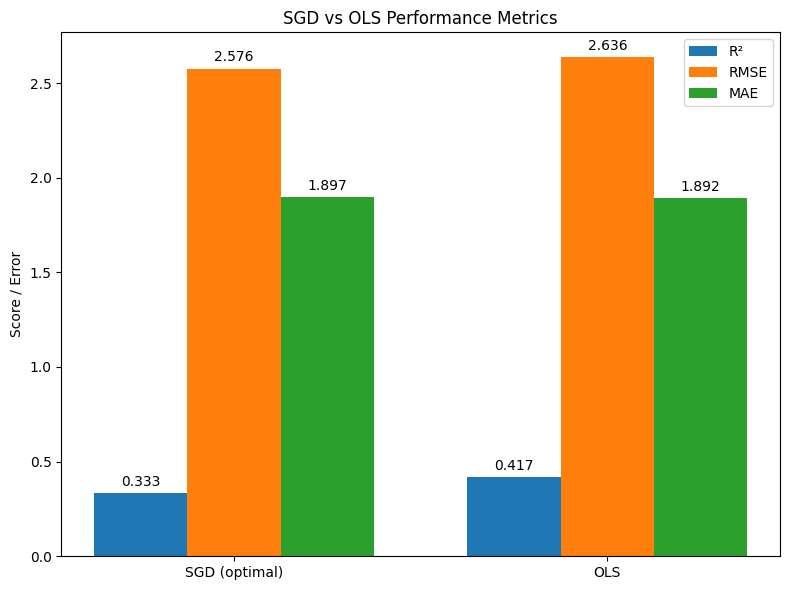

In [102]:
import matplotlib.pyplot as plt

# Metrics from your report
models = ["SGD (optimal)", "OLS"]
r2_scores = [0.333, 0.417]
rmse_scores = [2.576, 2.636]
mae_scores = [1.897, 1.892]  # OLS MAE is close to SGD, adjust if you have exact value

x = np.arange(len(models))
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(8,6))

# Bars for each metric
rects1 = ax.bar(x - width, r2_scores, width, label="R²")
rects2 = ax.bar(x, rmse_scores, width, label="RMSE")
rects3 = ax.bar(x + width, mae_scores, width, label="MAE")

# Labels and formatting
ax.set_ylabel("Score / Error")
ax.set_title("SGD vs OLS Performance Metrics")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels above bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.3f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha="center", va="bottom")

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()
